In [1]:
from pyspark.sql import SparkSession
import pyspark
import pandas as pd
from pyspark.sql.functions import col,isnan,when,count,desc, avg, when, expr, min, max

In [2]:
#Creating session
spark = SparkSession \
    .builder \
    .appName("Q1") \
    .getOrCreate()

In [3]:
spark

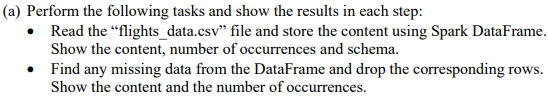

In [4]:
flightData = spark\
    .read\
    .option("inferSchema", "true")\
    .option("header", "true")\
    .csv ("flights_data_v2.csv")

In [5]:
flightData.show(10)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

In [6]:
print("Number of Rows", flightData.count())

Number of Rows 10000


In [7]:
flightData.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- dep_time: integer (nullable = true)
 |-- dep_delay: integer (nullable = true)
 |-- arr_time: integer (nullable = true)
 |-- arr_delay: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: integer (nullable = true)
 |-- distance: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- minute: integer (nullable = true)



In [8]:
flightData.select(
    [count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in flightData.columns]).show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|   0|    0|  0|      48|       48|      55|       75|      0|     14|     0|     0|   0|      75|       0|  48|    48|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+



In [9]:
flightData.filter(flightData.arr_delay.isNull()).show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|    4|  6|    1329|        4|    2159|     null|     DL| N130DL|  1929|   SEA| ATL|    null|    2182|  13|    29|
|2014|    3|  4|    null|     null|    null|     null|     UA|   null|   156|   SEA| DEN|    null|    1024|null|  null|
|2014|    2| 12|    null|     null|    null|     null|     AS| N527AS|     2|   SEA| DCA|    null|    2329|null|  null|
|2014|    7|  1|    null|     null|    null|     null|     WN| N8323C|  2485|   SEA| MDW|    null|    1733|null|  null|
|2014|   12| 27|    1420|       40|    2012|     null|     OO| N224AG|  3452|   SEA| HDN|    null|     891|  14|    20|
+----+-----+---+--------+---------+-----

In [10]:
flightData.na.drop().show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
+----+-----+---+--------+---------+-----

In [11]:
flightDataV2 = flightData.na.drop()

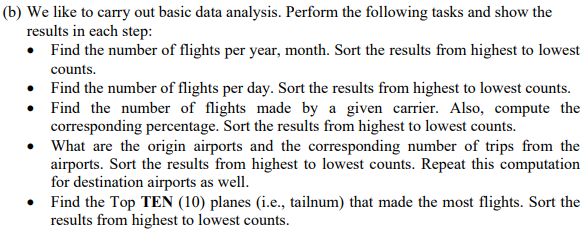

In [12]:
flights_year_month = flightDataV2.groupBy("year", "month").agg(count("*").alias("flight_count")).orderBy(desc("flight_count"))
flights_year_month.show()

+----+-----+------------+
|year|month|flight_count|
+----+-----+------------+
|2014|    8|        1058|
|2014|    7|         973|
|2014|    6|         883|
|2014|    5|         840|
|2014|    9|         833|
|2014|   10|         811|
|2014|    4|         810|
|2014|   12|         799|
|2014|    3|         787|
|2014|   11|         777|
|2014|    1|         732|
|2014|    2|         622|
+----+-----+------------+



In [13]:
flights_day = flightDataV2.groupBy("day").agg(count("*").alias("flight_count")).orderBy(desc("flight_count"))
flights_day.show()

+---+------------+
|day|flight_count|
+---+------------+
|  1|         358|
|  3|         356|
| 28|         349|
| 17|         349|
| 15|         345|
|  9|         345|
|  2|         345|
| 21|         339|
| 30|         339|
| 10|         337|
| 14|         329|
|  5|         328|
|  6|         326|
| 18|         324|
| 29|         323|
| 22|         322|
| 27|         321|
| 23|         321|
|  7|         320|
| 26|         315|
+---+------------+
only showing top 20 rows



In [14]:
flight_carrier = flightDataV2.groupBy("carrier").agg(count("*").alias("flight_count")).orderBy(desc("flight_count"))
flight_carrier.show()

+-------+------------+
|carrier|flight_count|
+-------+------------+
|     AS|        3771|
|     WN|        1384|
|     OO|        1163|
|     DL|        1077|
|     UA|        1039|
|     AA|         476|
|     US|         364|
|     B6|         213|
|     VX|         186|
|     F9|         181|
|     HA|          71|
+-------+------------+



In [15]:
total_flights = flightDataV2.count()
carrier_percentage = flight_carrier.withColumn("percentage", (flight_carrier["flight_count"] / total_flights) * 100)
carrier_percentage = carrier_percentage.orderBy(desc("flight_count"))
carrier_percentage.show()

+-------+------------+------------------+
|carrier|flight_count|        percentage|
+-------+------------+------------------+
|     AS|        3771|37.994962216624685|
|     WN|        1384|13.944584382871536|
|     OO|        1163|11.717884130982368|
|     DL|        1077|10.851385390428211|
|     UA|        1039|10.468513853904282|
|     AA|         476| 4.795969773299748|
|     US|         364|3.6675062972292194|
|     B6|         213| 2.146095717884131|
|     VX|         186|1.8740554156171283|
|     F9|         181|1.8236775818639799|
|     HA|          71|0.7153652392947104|
+-------+------------+------------------+



In [16]:
flight_origin = flightDataV2.groupBy("origin").agg(count("*").alias("flight_count")).orderBy(desc("flight_count"))
flight_origin.show()

+------+------------+
|origin|flight_count|
+------+------------+
|   SEA|        6711|
|   PDX|        3214|
+------+------------+



In [17]:
flight_destination = flightDataV2.groupBy("dest").agg(count("*").alias("flight_count")).orderBy(desc("flight_count"))
flight_destination.show()

+----+------------+
|dest|flight_count|
+----+------------+
| SFO|         779|
| LAX|         611|
| DEN|         580|
| PHX|         526|
| LAS|         520|
| ANC|         449|
| ORD|         431|
| SLC|         396|
| SJC|         369|
| DFW|         369|
| OAK|         333|
| SMF|         283|
| SAN|         269|
| ATL|         256|
| MSP|         238|
| IAH|         223|
| SNA|         197|
| LGB|         174|
| JFK|         170|
| PDX|         154|
+----+------------+
only showing top 20 rows



In [18]:
top_10_planes = flightDataV2.groupBy("tailnum").agg(count("*").alias("flight_count")).orderBy(desc("flight_count")).limit(10)
top_10_planes.show()

+-------+------------+
|tailnum|flight_count|
+-------+------------+
| N612AS|          50|
| N219AG|          50|
| N224AG|          49|
| N218AG|          49|
| N223AG|          49|
| N611AS|          46|
| N607AS|          45|
| N225AG|          45|
| N435AS|          45|
| N615AS|          44|
+-------+------------+



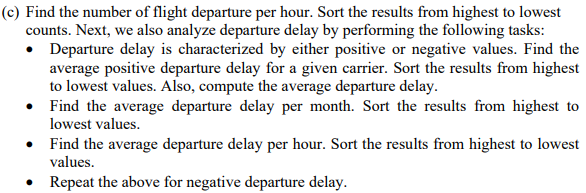

In [19]:
flights_hour = flightDataV2.groupBy("hour").agg(count("*").alias("flight_count")).orderBy(desc("flight_count"))
flights_hour.show()

+----+------------+
|hour|flight_count|
+----+------------+
|   6|         896|
|  10|         802|
|  11|         721|
|   7|         708|
|   8|         658|
|  13|         649|
|  18|         568|
|  12|         539|
|  14|         538|
|  15|         465|
|   9|         454|
|   5|         430|
|  19|         409|
|  17|         394|
|  16|         388|
|  20|         354|
|  22|         310|
|  21|         281|
|  23|         250|
|   0|          89|
+----+------------+
only showing top 20 rows



In [20]:
positive_delay = flightDataV2.filter(flightDataV2.dep_delay >= 0)
avg_positive_delay = positive_delay.groupBy("carrier").agg(avg("dep_delay").alias("avg_positive_delay")).orderBy(desc("avg_positive_delay"))
avg_positive_delay.show()

+-------+------------------+
|carrier|avg_positive_delay|
+-------+------------------+
|     AA| 33.96568627450981|
|     VX| 32.94827586206897|
|     HA|32.705882352941174|
|     OO|30.744897959183675|
|     B6|24.829545454545453|
|     UA|24.412429378531073|
|     F9| 22.25925925925926|
|     DL| 21.65068493150685|
|     WN|20.359550561797754|
|     US|17.853658536585368|
|     AS| 17.27389984825493|
+-------+------------------+



In [21]:
avg_carrier_delay = flightDataV2.groupBy("carrier").agg(avg("dep_delay").alias("avg_carrier_delay")).orderBy(desc("avg_carrier_delay"))
avg_carrier_delay.show()

+-------+------------------+
|carrier| avg_carrier_delay|
+-------+------------------+
|     WN| 12.06791907514451|
|     AA|11.558823529411764|
|     UA|10.094321462945139|
|     VX| 7.161290322580645|
|     B6| 6.859154929577465|
|     F9| 6.480662983425415|
|     DL|  6.47075208913649|
|     OO|3.4849527085124676|
|     HA| 3.112676056338028|
|     US|3.0054945054945055|
|     AS|  2.94325112702201|
+-------+------------------+



In [22]:
avg_monthly_delay = flightDataV2.groupBy("month").agg(avg("dep_delay").alias("avg_monthly_delay")).orderBy(desc("avg_monthly_delay"))
avg_monthly_delay.show()

+-----+-----------------+
|month|avg_monthly_delay|
+-----+-----------------+
|   12|9.732165206508135|
|    2|9.541800643086816|
|    7|6.911613566289826|
|    6|6.638731596828992|
|    8|6.437618147448015|
|    1|6.331967213114754|
|    4|5.779012345679012|
|    3|5.287166454891995|
|   11|4.827541827541827|
|    9|4.805522208883554|
|   10|3.995067817509248|
|    5|2.992857142857143|
+-----+-----------------+



In [23]:
avg_hourly_delay = flightDataV2.groupBy("hour").agg(avg("dep_delay").alias("avg_hourly_delay")).orderBy(desc("avg_hourly_delay"))
avg_hourly_delay.show()

+----+------------------+
|hour|  avg_hourly_delay|
+----+------------------+
|   2|             169.5|
|   1| 75.88235294117646|
|   0| 16.97752808988764|
|  21|13.590747330960854|
|  19| 13.30317848410758|
|  16|12.061855670103093|
|  12|10.712430426716141|
|  14| 10.25278810408922|
|  24|              10.0|
|  20|  9.94915254237288|
|  22| 9.825806451612904|
|  15| 9.804301075268818|
|  23|             8.856|
|  17| 7.243654822335025|
|  13| 7.092449922958398|
|  11| 6.550624133148405|
|  18| 6.158450704225352|
|   9|  4.76431718061674|
|  10| 3.942643391521197|
|   8|1.3161094224924013|
+----+------------------+
only showing top 20 rows



In [53]:
negative_delay = flightDataV2.filter(flightDataV2.dep_delay < 0)
avg_negative_carrier_delay = negative_delay.groupBy("carrier").agg(avg("dep_delay").alias("avg_negative_carrier_delay")).orderBy(desc("avg_negative_carrier_delay"))
avg_negative_carrier_delay.show()

+-------+--------------------------+
|carrier|avg_negative_carrier_delay|
+-------+--------------------------+
|     WN|       -2.8704453441295548|
|     DL|       -3.9342723004694835|
|     VX|                -4.5234375|
|     US|        -4.572614107883817|
|     AS|        -4.756624541377905|
|     UA|        -4.872047244094488|
|     AA|       -5.2463235294117645|
|     OO|       -5.7376294591484465|
|     B6|                    -5.792|
|     HA|        -6.203703703703703|
|     F9|                      -6.3|
+-------+--------------------------+



In [25]:
avg_negative_carrier_delay = negative_delay.groupBy("carrier").agg(avg("dep_delay").alias("avg_negative_carrier_delay")).orderBy(desc("avg_negative_carrier_delay"))
avg_negative_carrier_delay.show()

+-------+--------------------------+
|carrier|avg_negative_carrier_delay|
+-------+--------------------------+
|     WN|       -2.8704453441295548|
|     DL|       -3.9342723004694835|
|     VX|                -4.5234375|
|     US|        -4.572614107883817|
|     AS|        -4.756624541377905|
|     UA|        -4.872047244094488|
|     AA|       -5.2463235294117645|
|     OO|       -5.7376294591484465|
|     B6|                    -5.792|
|     HA|        -6.203703703703703|
|     F9|                      -6.3|
+-------+--------------------------+



In [26]:
avg_negative_monthly_delay = negative_delay.groupBy("month").agg(avg("dep_delay").alias("avg_negative_monthly_delay")).orderBy(desc("avg_negative_monthly_delay"))
avg_negative_monthly_delay.show()

+-----+--------------------------+
|month|avg_negative_monthly_delay|
+-----+--------------------------+
|    8|        -4.373737373737374|
|    7|        -4.421150278293135|
|   12|        -4.489311163895487|
|    2|       -4.5436046511627906|
|    6|        -4.564732142857143|
|    3|        -4.676171079429735|
|    1|        -4.715859030837004|
|    9|        -4.864503816793893|
|   11|        -4.976958525345622|
|   10|        -4.998076923076923|
|    4|        -5.007380073800738|
|    5|        -5.104895104895105|
+-----+--------------------------+



In [52]:
avg_negative_hourly_delay = negative_delay.groupBy("hour").agg(avg("dep_delay").alias("avg_negative_hourly_delay")).orderBy(desc("avg_negative_hourly_delay"))
avg_negative_hourly_delay.show()

+----+-------------------------+
|hour|avg_negative_hourly_delay|
+----+-------------------------+
|  23|       -4.099099099099099|
|  10|       -4.359504132231405|
|  22|       -4.396449704142012|
|  13|       -4.411940298507463|
|  11|       -4.425925925925926|
|  21|       -4.553846153846154|
|   8|       -4.571115973741795|
|   7|       -4.588822355289421|
|   6|       -4.651470588235294|
|  14|       -4.673992673992674|
|  16|       -4.758620689655173|
|   0|       -4.774193548387097|
|  18|        -4.80564263322884|
|  15|       -4.895582329317269|
|   9|       -4.902356902356902|
|  19|      -4.9951923076923075|
|   5|      -5.0473684210526315|
|  12|       -5.075757575757576|
|  17|       -5.635593220338983|
|  20|       -5.647342995169082|
+----+-------------------------+



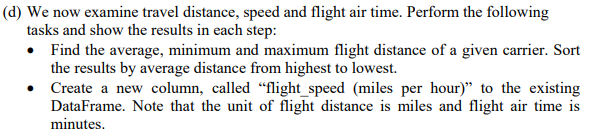

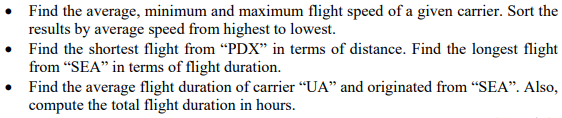

In [28]:
flight_status = flightDataV2.groupBy("carrier").agg(avg("distance").alias("average_distance"),
                                                    min("distance").alias("minimum_distance"),
                                                    max("distance").alias("maximum_distance")
                                                   ).orderBy(desc("average_distance"))
flight_status.show()

+-------+------------------+----------------+----------------+
|carrier|  average_distance|minimum_distance|maximum_distance|
+-------+------------------+----------------+----------------+
|     HA|2630.0985915492956|            2603|            2677|
|     AA| 1738.170168067227|            1107|            2724|
|     B6|1631.2676056338028|             846|            2537|
|     DL|1563.9526462395543|             630|            2677|
|     US|1525.4697802197802|            1009|            2406|
|     UA| 1454.966313763234|             550|            2434|
|     AS|1218.0262529832935|              93|            2717|
|     F9|1033.7237569060774|             991|            2021|
|     WN| 906.7124277456647|             444|            2358|
|     VX|  759.005376344086|             550|             954|
|     OO| 604.8039552880482|             106|            1368|
+-------+------------------+----------------+----------------+



In [29]:
flightData_V2 = flightDataV2.withColumn("flight_speed (miles per hour)", expr("distance / (air_time/60)"))
flightData_V2.show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|flight_speed (miles per hour)|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|            433.6363636363636|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|            446.1666666666667|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|           367.02702702702703|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|  

In [30]:
flight_status_new = flightData_V2.groupBy("carrier").agg(avg("flight_speed (miles per hour)").alias("average_flight_speed"),
                                                    min("flight_speed (miles per hour)").alias("minimum_flight_speed"),
                                                    max("flight_speed (miles per hour)").alias("maximum_flight_speed")
                                                   ).orderBy(desc("average_flight_speed"))
flight_status_new.show()

+-------+--------------------+--------------------+--------------------+
|carrier|average_flight_speed|minimum_flight_speed|maximum_flight_speed|
+-------+--------------------+--------------------+--------------------+
|     AA|  509.16369335823174|  423.82978723404256|   579.0697674418604|
|     DL|  500.52741840814036|   311.6571428571429|   600.5504587155964|
|     US|  491.35185219289446|   380.7547169811321|   605.0442477876106|
|     F9|  483.45310570268094|  407.26027397260276|   560.9433962264151|
|     B6|   482.0234342806243|   357.4074074074074|               576.0|
|     UA|  478.65502843497194|               275.0|   588.6910994764398|
|     HA|  473.32799325853324|    415.748031496063|    538.551724137931|
|     AS|   451.7704065218219|  199.28571428571428|   652.3404255319149|
|     WN|   446.9533544734973|   322.5742574257426|   557.4803149606299|
|     VX|   421.2527772561953|    331.219512195122|  511.07142857142856|
|     OO|   374.6486184495994|   157.9591836734694|

In [31]:
shortest_PDX_flight = flightData_V2.filter(flightData_V2.origin == "PDX").orderBy("distance").limit(1)
shortest_PDX_flight.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|flight_speed (miles per hour)|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
|2014|    3| 20|    1200|       -8|    1239|       -7|     OO| N569SW|  5411|   PDX| EUG|      30|     106|  12|     0|                        212.0|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+



In [32]:
longest_PDX_flight = flightData_V2.filter(flightData_V2.origin == "PDX").orderBy(desc("distance")).limit(1)
longest_PDX_flight.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|flight_speed (miles per hour)|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
|2014|    1| 17|    1032|        7|    1430|      -15|     AS| N514AS|   803|   PDX| LIH|     341|    2631|  10|    32|            462.9325513196481|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+



In [33]:
UA_flights_SEA = flightData_V2.filter((flightData_V2.carrier == "UA") & (flightData_V2.origin == "SEA"))
UA_flights_SEA.show(2)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|flight_speed (miles per hour)|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
|2014|   10| 20|    1328|       -1|    1949|        4|     UA| N68805|  1212|   SEA| IAH|     228|    1874|  13|    28|           493.15789473684214|
|2014|    3| 13|    2201|        1|     554|      -14|     UA| N37468|  1275|   SEA| EWR|     268|    2402|  22|     1|            537.7611940298507|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------------------+
only showing top 2 rows



In [34]:
avg_UA_flights_SEA = UA_flights_SEA.agg(avg("air_time").alias("avg_UA_flights_SEA"))
avg_UA_flights_SEA.show()

+------------------+
|avg_UA_flights_SEA|
+------------------+
|181.63936781609195|
+------------------+



In [35]:
total_UA_flights_SEA = UA_flights_SEA.agg(expr("sum(air_time)/60").alias("total_UA_flights_SEA"))
total_UA_flights_SEA.show()

+--------------------+
|total_UA_flights_SEA|
+--------------------+
|   2107.016666666667|
+--------------------+



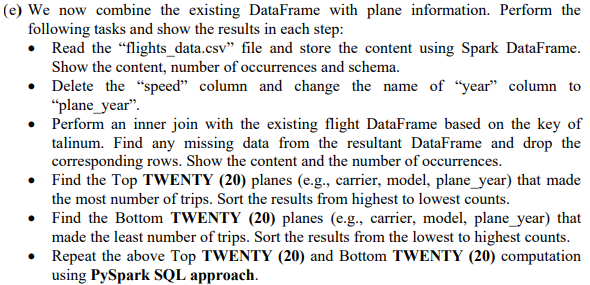

In [36]:
planeData = spark\
    .read\
    .option("inferSchema", "true")\
    .option("header", "true")\
    .csv ("planes_data_v2.csv")

In [37]:
planeData.show(5)

+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N104UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N105UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N107US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
only showing top 5 rows



In [38]:
print("Number of Rows", planeData.count())

Number of Rows 2628


In [39]:
planeData.printSchema()

root
 |-- tailnum: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- engines: integer (nullable = true)
 |-- seats: integer (nullable = true)
 |-- speed: integer (nullable = true)
 |-- engine: string (nullable = true)



In [40]:
planeDataV2 = planeData.drop("speed")
planeDataV2.show(5)

+-------+----+--------------------+----------------+--------+-------+-----+---------+
|tailnum|year|                type|    manufacturer|   model|engines|seats|   engine|
+-------+----+--------------------+----------------+--------+-------+-----+---------+
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
| N104UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
| N105UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
| N107US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
+-------+----+--------------------+----------------+--------+-------+-----+---------+
only showing top 5 rows



In [41]:
planeDataV2 = planeDataV2.withColumnRenamed("year","plane_year")
planeDataV2.show(5)

+-------+----------+--------------------+----------------+--------+-------+-----+---------+
|tailnum|plane_year|                type|    manufacturer|   model|engines|seats|   engine|
+-------+----------+--------------------+----------------+--------+-------+-----+---------+
| N102UW|      1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
| N103US|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
| N104UW|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
| N105UW|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
| N107US|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|Turbo-fan|
+-------+----------+--------------------+----------------+--------+-------+-----+---------+
only showing top 5 rows



In [42]:
combined_df = flightData_V2.join(planeDataV2, on='tailnum', how="inner")
combined_df.show(5)

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+--------------------+------------+--------+-------+-----+---------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|flight_speed (miles per hour)|plane_year|                type|manufacturer|   model|engines|seats|   engine|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+--------------------+------------+--------+-------+-----+---------+
| N846VA|2014|   12|  8|     658|       -7|     935|       -5|     VX|  1780|   SEA| LAX|     132|     954|   6|    58|            433.6363636363636|      2011|Fixed wing multi ...|      AIRBUS|A320-214|      2|  182|Turbo-fan|
| N559AS|2014|    1| 22|    1040|        5|    1505|        5|     AS|   851|   SEA| HNL

In [43]:
combined_df.select(
    [count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in combined_df.columns]).show()

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+----+------------+-----+-------+-----+------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|flight_speed (miles per hour)|plane_year|type|manufacturer|model|engines|seats|engine|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+----+------------+-----+-------+-----+------+
|      0|   0|    0|  0|       0|        0|       0|        0|      0|     0|     0|   0|       0|       0|   0|     0|                            0|        91|   0|           0|    0|      0|    0|     0|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+----+-----------

In [44]:
combined_df.filter(combined_df.plane_year.isNull()).show(5)

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+--------------------+--------------+-----------+-------+-----+---------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|flight_speed (miles per hour)|plane_year|                type|  manufacturer|      model|engines|seats|   engine|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+--------------------+--------------+-----------+-------+-----+---------+
| N918SW|2014|   12| 11|    1057|       87|    1315|      112|     OO|  6328|   PDX| SFO|     118|     550|  10|    57|           279.66101694915255|      null|Fixed wing multi ...|BOMBARDIER INC|CL-600-2B19|      2|   55|Turbo-fan|
| N527AS|2014|    3|  3|     647|       -3|    1007|      -12|     A

In [45]:
cleaned_combined_df = combined_df.dropna()
cleaned_combined_df.show(5)

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+--------------------+------------+--------+-------+-----+---------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|flight_speed (miles per hour)|plane_year|                type|manufacturer|   model|engines|seats|   engine|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------------------+----------+--------------------+------------+--------+-------+-----+---------+
| N846VA|2014|   12|  8|     658|       -7|     935|       -5|     VX|  1780|   SEA| LAX|     132|     954|   6|    58|            433.6363636363636|      2011|Fixed wing multi ...|      AIRBUS|A320-214|      2|  182|Turbo-fan|
| N559AS|2014|    1| 22|    1040|        5|    1505|        5|     AS|   851|   SEA| HNL

In [46]:
top_20_planes = cleaned_combined_df.groupBy("carrier", "model", "plane_year").agg(count("*").alias("trip_count")).orderBy(desc("trip_count")).limit(20)
top_20_planes.show()

+-------+-----------+----------+----------+
|carrier|      model|plane_year|trip_count|
+-------+-----------+----------+----------+
|     AS|    737-890|      2007|       343|
|     AS|  737-990ER|      2013|       330|
|     AS|    737-890|      2008|       308|
|     OO|CL-600-2C10|      2001|       300|
|     AS|    737-490|      1998|       282|
|     AS|    737-890|      2006|       281|
|     AS|    737-790|      1999|       256|
|     AS|    737-890|      2009|       209|
|     AS|  737-990ER|      2014|       206|
|     AS|    737-790|      2000|       161|
|     AS|    737-990|      2003|       142|
|     AS|    737-990|      2001|       133|
|     AS|  737-990ER|      2012|       128|
|     AS|    737-790|      2001|       120|
|     OO|CL-600-2D24|      2006|       118|
|     AS|    737-890|      2010|       109|
|     DL|    737-832|      2001|       108|
|     AS|    737-4Q8|      1992|        93|
|     WN|    737-7H4|      2004|        90|
|     AS|    737-490|      1997|

In [47]:
bottom_20_planes = cleaned_combined_df.groupBy("carrier", "model", "plane_year").agg(count("*").alias("trip_count")).orderBy(("trip_count")).limit(20)
bottom_20_planes.show()

+-------+--------------+----------+----------+
|carrier|         model|plane_year|trip_count|
+-------+--------------+----------+----------+
|     F9|      A319-112|      2009|         1|
|     US|       757-2S7|      1985|         1|
|     OO|   CL-600-2C10|      1999|         1|
|     AA|           150|      1959|         1|
|     US|      A319-132|      2006|         1|
|     US|      A319-132|      2005|         1|
|     WN|       737-705|      1998|         1|
|     DL|      A330-323|      2007|         1|
|     WN|       737-3T5|      1985|         1|
|     US|      A319-132|      2001|         1|
|     DL|     767-432ER|      2002|         1|
|     F9|      A319-112|      2004|         1|
|     DL|       757-251|      1988|         1|
|     DL|      MD-90-30|      1995|         1|
|     DL|     767-432ER|      2000|         1|
|     AA|DC-9-82(MD-82)|      1989|         1|
|     DL|      MD-90-30|      1994|         1|
|     US|      A321-211|      2008|         1|
|     WN|    

In [48]:
cleaned_combined_df.createOrReplaceTempView("combined_data")

In [49]:
top_twenty_plane = spark.sql("""
    SELECT carrier, model, plane_year, count(*) AS trip_count
    FROM combined_data
    GROUP BY carrier, model, plane_year
    ORDER BY trip_count DESC
    LIMIT 20
""")
top_twenty_plane.show()

+-------+-----------+----------+----------+
|carrier|      model|plane_year|trip_count|
+-------+-----------+----------+----------+
|     AS|    737-890|      2007|       343|
|     AS|  737-990ER|      2013|       330|
|     AS|    737-890|      2008|       308|
|     OO|CL-600-2C10|      2001|       300|
|     AS|    737-490|      1998|       282|
|     AS|    737-890|      2006|       281|
|     AS|    737-790|      1999|       256|
|     AS|    737-890|      2009|       209|
|     AS|  737-990ER|      2014|       206|
|     AS|    737-790|      2000|       161|
|     AS|    737-990|      2003|       142|
|     AS|    737-990|      2001|       133|
|     AS|  737-990ER|      2012|       128|
|     AS|    737-790|      2001|       120|
|     OO|CL-600-2D24|      2006|       118|
|     AS|    737-890|      2010|       109|
|     DL|    737-832|      2001|       108|
|     AS|    737-4Q8|      1992|        93|
|     WN|    737-7H4|      2004|        90|
|     AS|    737-490|      1997|

In [50]:
bottom_twenty_plane = spark.sql("""
    SELECT carrier, model, plane_year, count(*) AS trip_count
    FROM combined_data
    GROUP BY carrier, model, plane_year
    ORDER BY trip_count 
    LIMIT 20
""")
bottom_twenty_plane.show()

+-------+--------------+----------+----------+
|carrier|         model|plane_year|trip_count|
+-------+--------------+----------+----------+
|     F9|      A319-112|      2009|         1|
|     US|       757-2S7|      1985|         1|
|     OO|   CL-600-2C10|      1999|         1|
|     AA|           150|      1959|         1|
|     US|      A319-132|      2006|         1|
|     US|      A319-132|      2005|         1|
|     WN|       737-705|      1998|         1|
|     DL|      A330-323|      2007|         1|
|     WN|       737-3T5|      1985|         1|
|     US|      A319-132|      2001|         1|
|     DL|     767-432ER|      2002|         1|
|     F9|      A319-112|      2004|         1|
|     DL|       757-251|      1988|         1|
|     DL|      MD-90-30|      1995|         1|
|     DL|     767-432ER|      2000|         1|
|     AA|DC-9-82(MD-82)|      1989|         1|
|     DL|      MD-90-30|      1994|         1|
|     US|      A321-211|      2008|         1|
|     WN|    